In [1]:
#Import necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv("h1b_kaggle_clean.csv",index_col=0)
df.head()

/Users/jkyung/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


index          CASE_STATUS  \
0      1  CERTIFIED-WITHDRAWN   
1      2  CERTIFIED-WITHDRAWN   
2      3  CERTIFIED-WITHDRAWN   
3      4  CERTIFIED-WITHDRAWN   
4      5            WITHDRAWN   

                                       EMPLOYER_NAME  \
0                             UNIVERSITY OF MICHIGAN   
1                             GOODMAN NETWORKS, INC.   
2                          PORTS AMERICA GROUP, INC.   
3  GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...   
4                          PEABODY INVESTMENTS CORP.   

                        SOC_NAME                     JOB_TITLE  \
0  BIOCHEMISTS AND BIOPHYSICISTS  POSTDOCTORAL RESEARCH FELLOW   
1               CHIEF EXECUTIVES       CHIEF OPERATING OFFICER   
2               CHIEF EXECUTIVES         CHIEF PROCESS OFFICER   
3               CHIEF EXECUTIVES   REGIONAL PRESIDEN, AMERICAS   
4               CHIEF EXECUTIVES  PRESIDENT MONGOLIA AND INDIA   

  FULL_TIME_POSITION  PREVAILING_WAGE  YEAR                 WORKSITE  \
0                  N          36067.0  2016      ANN ARBOR, MICHIGAN   
1                  Y         242674.0  2016             PLANO, TEXAS   
2                  Y         193066.0  2016  JERSEY CITY, NEW JERSEY   
3                  Y         220314.0  2016         DENVER, COLORADO   
4                  Y         157518.4  2016      ST. LOUIS, MISSOURI   

          lon        lat       STATE  
0  -83.743038  42.280826    Michigan  
1  -96.698886  33.019843       Texas  
2  -74.077642  40.728158  New Jersey  
3 -104.990251  39.739236    Colorado  
4  -90.199404  38.627003    Missouri

In [3]:
#let's start by seeing the different case status of the h1b visa
df.CASE_STATUS.unique()

array(['CERTIFIED-WITHDRAWN', 'WITHDRAWN', 'CERTIFIED', 'DENIED',
       'REJECTED', 'INVALIDATED',
       'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED'], dtype=object)

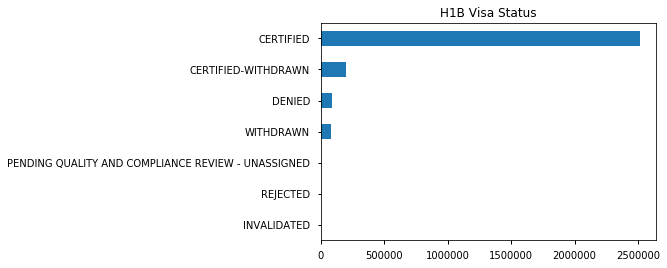

In [4]:
#Graph a bar plot to see in general how many cases were in each category
sns.set_context("notebook")
plt.title('H1B Visa Status')
df.CASE_STATUS.value_counts().sort_values().plot(kind='barh')
plt.show()

In [5]:
#How many companies are in this analysis? job titles? occupations?
print("Companies:", len(df.EMPLOYER_NAME.unique()))
print("Job Titles:", len(df.JOB_TITLE.unique()))
print("Occupations:", len(df.SOC_NAME.unique()))

Companies: 214976
Job Titles: 275476
Occupations: 1523


In [6]:
#What are some of the companies?
df.EMPLOYER_NAME.unique()

array(['UNIVERSITY OF MICHIGAN', 'GOODMAN NETWORKS, INC.',
       'PORTS AMERICA GROUP, INC.', ...,
       'ELEGANT SUPER STORES CORPORATE CORP (HDQTRS)',
       'TELSEY CAPITAL GROUP LLC', 'J. LOGAN INTERIORS'], dtype=object)

In [7]:
#How about the top 20 firms who are able to certify h1b visas?
df_cert = df[df['CASE_STATUS'].isin(['CERTIFIED'])]
df_cert.EMPLOYER_NAME.value_counts().sort_values(ascending=False).head(20)

INFOSYS LIMITED                                    129609
TATA CONSULTANCY SERVICES LIMITED                   63801
WIPRO LIMITED                                       41190
DELOITTE CONSULTING LLP                             35382
ACCENTURE LLP                                       32697
IBM INDIA PRIVATE LIMITED                           27291
MICROSOFT CORPORATION                               22311
HCL AMERICA, INC.                                   22055
ERNST & YOUNG U.S. LLP                              17739
CAPGEMINI AMERICA INC                               15863
COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION     15065
LARSEN & TOUBRO INFOTECH LIMITED                    13659
GOOGLE INC.                                         12320
IGATE TECHNOLOGIES INC.                             11850
TECH MAHINDRA (AMERICAS),INC.                       10525
INTEL CORPORATION                                   10116
IBM CORPORATION                                      9458
DELOITTE & TOU

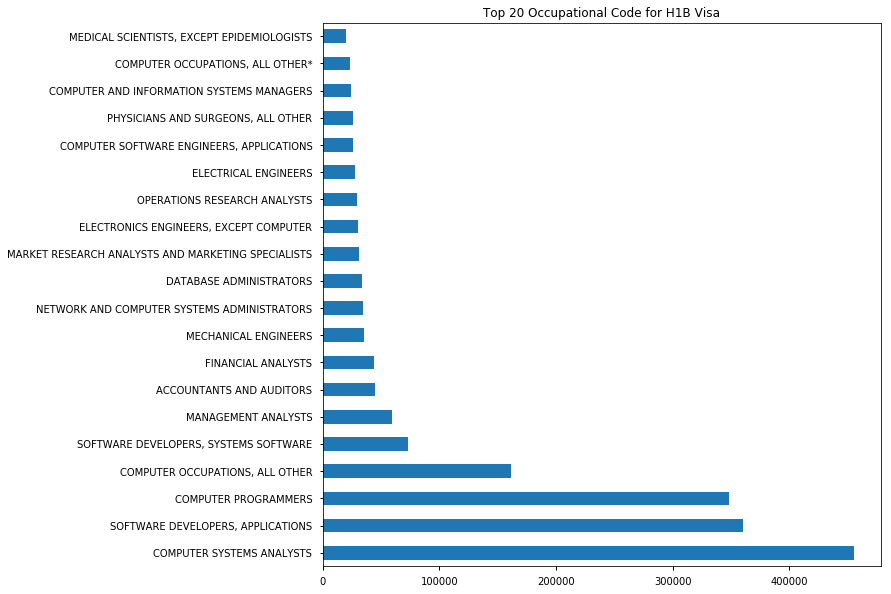

In [8]:
#What about the top occupational codes?
sns.set_context("notebook")
plt.figure(figsize=(10,10))
plt.title('Top 20 Occupational Code for H1B Visa')
df_cert.SOC_NAME.value_counts().sort_values(ascending=False).head(20).plot(kind='barh')
plt.show()

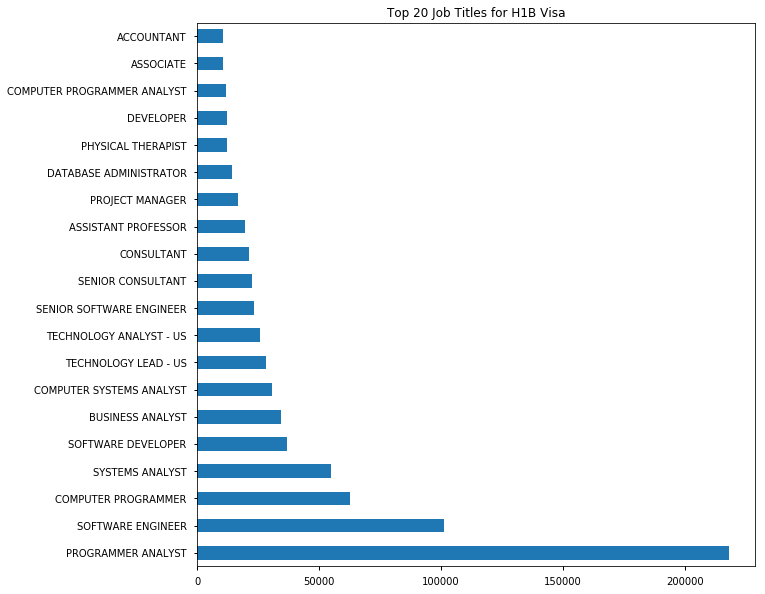

In [9]:
#How about top job titles?
sns.set_context("notebook")
plt.figure(figsize=(10,10))
plt.title('Top 20 Job Titles for H1B Visa')
df_cert.JOB_TITLE.value_counts().sort_values(ascending=False).head(20).plot(kind='barh')
plt.show()

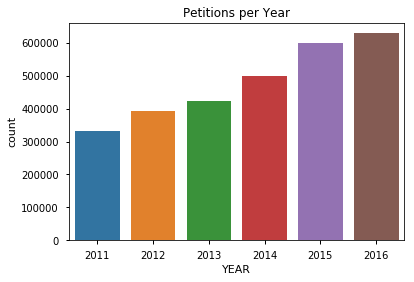

In [10]:
#How many applications were there per year?
sns.set_context("notebook",font_scale=1.0)
plt.title('Petitions per Year')
sns.countplot(df['YEAR'])
plt.show()

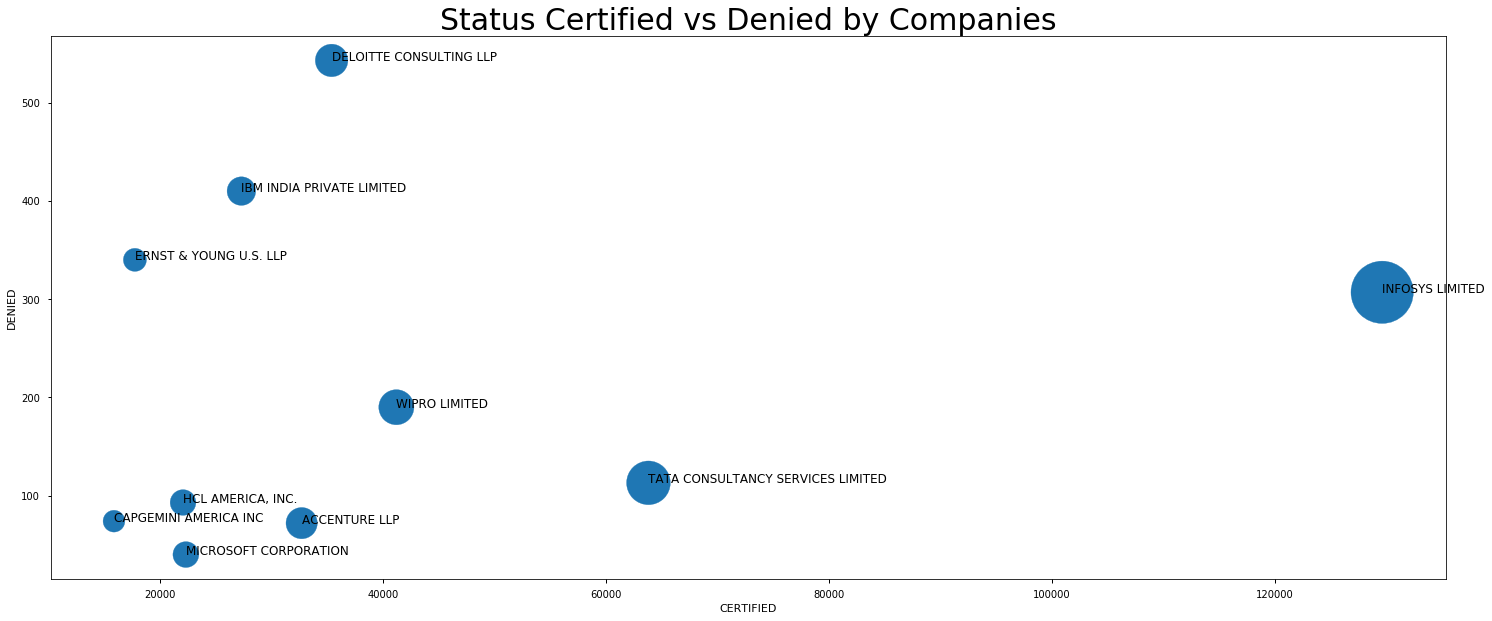

In [11]:
# Let's see which companies had the most applications certified versus denied.
comp_den=df[df['CASE_STATUS'].isin(['CERTIFIED','DENIED'])]
comp_den=comp_den[comp_den['EMPLOYER_NAME'].isin(comp_den['EMPLOYER_NAME'].value_counts().sort_values(ascending=False)[:10].index)]
comp_den=comp_den.groupby(['EMPLOYER_NAME','CASE_STATUS'])['JOB_TITLE'].count().reset_index()
comp_den=comp_den.pivot('EMPLOYER_NAME','CASE_STATUS','JOB_TITLE')
plt.figure(figsize=(25,10))
plt.scatter('CERTIFIED','DENIED',data=comp_den,s=comp_den['CERTIFIED']*0.03)
for i in range(comp_den.shape[0]):
    plt.text(comp_den['CERTIFIED'].values[i],comp_den['DENIED'].values[i],s=comp_den.index[i])
plt.title('Status Certified vs Denied by Companies',size=30)
plt.xlabel('CERTIFIED')
plt.ylabel('DENIED')
plt.show()

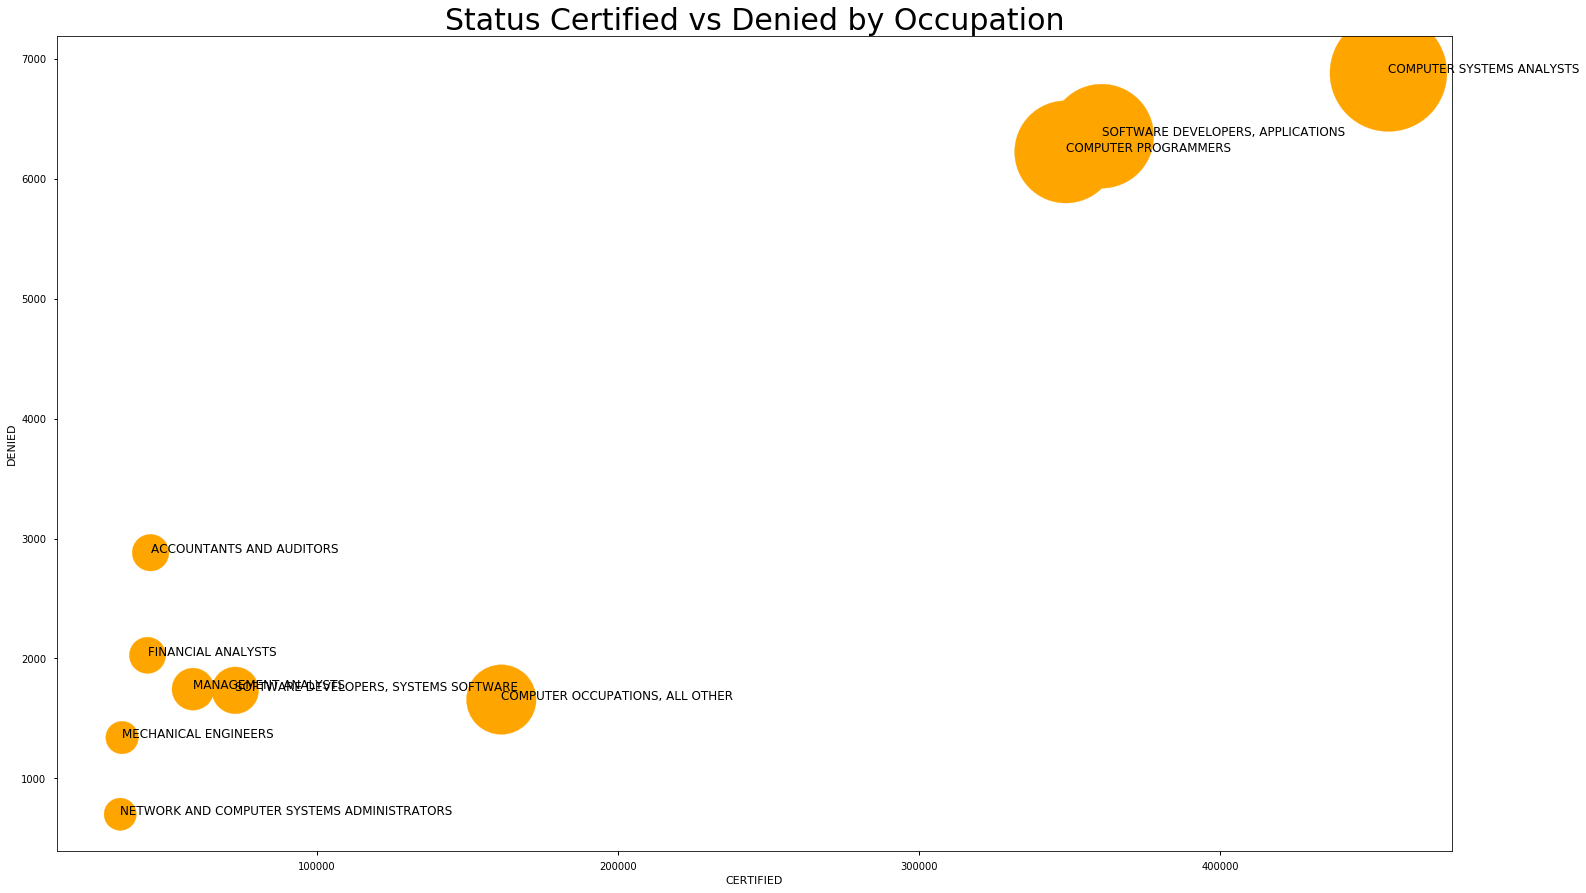

In [12]:
# How about which occupation instead?
occ_den=df[df['CASE_STATUS'].isin(['CERTIFIED','DENIED'])]
occ_den=occ_den[occ_den['SOC_NAME'].isin(occ_den['SOC_NAME'].value_counts().sort_values(ascending=False)[:10].index)]
occ_den=occ_den.groupby(['SOC_NAME','CASE_STATUS'])['JOB_TITLE'].count().reset_index()
occ_den=occ_den.pivot('SOC_NAME','CASE_STATUS','JOB_TITLE')
plt.figure(figsize=(25,15))
plt.scatter('CERTIFIED','DENIED',data=occ_den,s=occ_den['CERTIFIED']*.03,c='orange')
for i in range(comp_den.shape[0]):
    plt.text(occ_den['CERTIFIED'].values[i],occ_den['DENIED'].values[i],s=occ_den.index[i])
plt.title('Status Certified vs Denied by Occupation',size=30)
plt.xlabel('CERTIFIED')
plt.ylabel('DENIED')
plt.show()

In [13]:
# Moving onto salary, let's see what we can find.
df.PREVAILING_WAGE.describe()

count    2.877742e+06
mean     1.427362e+05
std      3.340458e+06
min      1.516000e+01
25%      5.460000e+04
50%      6.512500e+04
75%      8.151500e+04
max      1.007814e+09
Name: PREVAILING_WAGE, dtype: float64

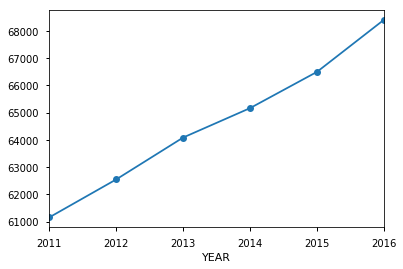

In [14]:
# will bin low, med, high as < 33%, in between, and >= 67% percentiles
summary = np.percentile(df.PREVAILING_WAGE, [33, 67])

low_wage = df[df.PREVAILING_WAGE < summary[0]]
med_wage = df[(df.PREVAILING_WAGE >= summary[0]) & (df.PREVAILING_WAGE < summary[1])]
high_wage = df[df.PREVAILING_WAGE >= summary[1]]

# plot median over the years; can see increasing median wages as time goes by.
df[df['PREVAILING_WAGE']<1000000000].groupby('YEAR')['PREVAILING_WAGE'].median().plot(marker='o')
plt.show()

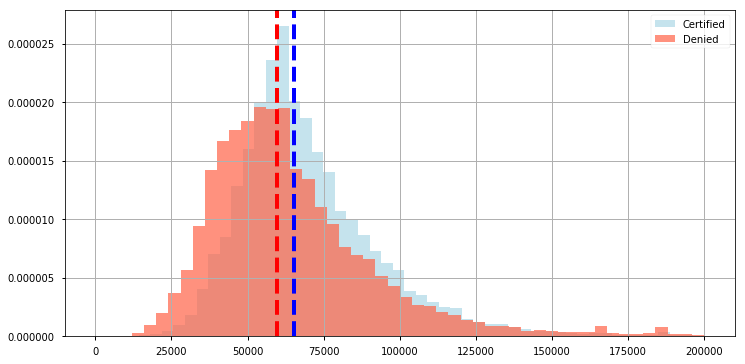

In [15]:
#data was really skewed to the right, so limit the wage to see the distribution better
plt.figure(figsize=(12,6))
df[(df['PREVAILING_WAGE']<200000)&(df['CASE_STATUS']=='CERTIFIED')].PREVAILING_WAGE.hist(bins=50, color="lightblue", alpha=0.7, label='Certified', normed=True)
plt.axvline(df[(df['PREVAILING_WAGE']<=200000)&(df['CASE_STATUS']=='CERTIFIED')].PREVAILING_WAGE.median(), color='blue', linestyle='dashed', linewidth=4)
df[(df['PREVAILING_WAGE']<200000)&(df['CASE_STATUS']=='DENIED')].PREVAILING_WAGE.hist(bins=50,color="tomato", alpha=0.7, label='Denied', normed=True)
plt.axvline(df[(df['PREVAILING_WAGE']<=200000)&(df['CASE_STATUS']=='DENIED')].PREVAILING_WAGE.median(), color='red', linestyle='dashed', linewidth=4)
plt.legend()
plt.show()
# Looks like there are not much difference between salaries.

In [16]:
# Since we have lat/lon details, we can also map out different information. Import necessary packages.
import folium
from folium import plugins

m = folium.Map(location=[48, -102], tiles='CartoDB dark_matter',zoom_start=3)

applications = plugins.MarkerCluster().add_to(m)

# Let's first check Denied applications and where that is most prevalent.
df_den = df[df['CASE_STATUS'] == "DENIED"][0:1800]
# Couldn't map all data points, maps up to 1800.

for lat, lng, label, in zip(df_den['lat'], df_den['lon'], df_den['CASE_STATUS']):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(applications)

m

In [17]:
# Repeat but with certified applications.
m2 = folium.Map(location=[48, -102], tiles='CartoDB dark_matter',zoom_start=3)

applications = plugins.MarkerCluster().add_to(m2)

df_cert = df[df['CASE_STATUS'] == "CERTIFIED"][0:1800]

for lat, lng, label, in zip(df_cert['lat'], df_cert['lon'], df_cert['CASE_STATUS']):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(applications)

m2

In [18]:
# Finally Let's check with the top occupation which was 'computer systems analysts'
m3 = folium.Map(location=[48, -102], tiles='CartoDB dark_matter',zoom_start=3)

applications = plugins.MarkerCluster().add_to(m3)

df_csa = df[(df['SOC_NAME'].str.contains('COMPUTER SYSTEMS ANALYSTS'))&(df['CASE_STATUS'] == 'CERTIFIED')][0:1800]

for lat, lng, label, in zip(df_csa['lat'], df_csa['lon'], df_csa['SOC_NAME']):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(applications)

m3

In [19]:
comsysana=df[(df['SOC_NAME'].str.contains('COMPUTER SYSTEMS ANALYSTS'))&(df['CASE_STATUS'] == 'CERTIFIED')]
print(len(comsysana['SOC_NAME']))
print(1800/len(comsysana['SOC_NAME']))
#not even capturing a percent of the population... need a better method = Chloropeths

457419
0.003935122939799178


In [30]:
df['Total'] = df.groupby('STATE')['STATE'].transform('count')
df_us = df.groupby('STATE').sum()
df_us.reset_index(inplace=True)
df_us.loc[:,'Total']=df_us['Total']/np.max(df_us['Total'])*100

STATE         index  PREVAILING_WAGE        YEAR  \
0                Alabama   13509881302     1.350707e+09    17406960   
1                 Alaska    1921033588     3.273481e+08     2247015   
2                Arizona   57728562043     6.822498e+09    80929940   
3               Arkansas   19959178133     1.656797e+09    27742037   
4             California  817379820363     8.757036e+10  1104685376   
5               Colorado   45072135102     4.067888e+09    60881839   
6            Connecticut   73243162217     6.186374e+09    97013401   
7               Delaware   26875980700     2.781269e+09    35654594   
8   District Of Columbia   36410768984     3.371184e+09    45121084   
9                Florida  156778071500     1.434931e+10   202138217   
10               Georgia  140318349286     1.225039e+10   200756347   
11                Hawaii    5493289116     3.530956e+08     6354295   
12                 Idaho    5916468286     6.154338e+08     7605908   
13              Illinois  229650559881     2.100777e+10   311831728   
14               Indiana   42709370937     2.662609e+09    56848866   
15                  Iowa   24092333237     1.184279e+09    30493352   
16                Kansas   18895275504     1.782221e+09    24832339   
17              Kentucky   16638056956     1.045760e+09    22087823   
18             Louisiana   15310169180     1.457875e+09    20224805   
19                 Maine    4928901229     5.004885e+08     6307032   
20              Maryland   84006995605     7.874409e+09   107018157   
21         Massachusetts  170216458039     1.591245e+10   226875006   
22              Michigan  108771460132     1.110444e+10   156832456   
23             Minnesota   68977412852     6.159472e+09    92363327   
24           Mississippi    4277831066     2.724369e+08     5408874   
25              Missouri   47428523904     3.793815e+09    65930943   
26               Montana    1029429650     4.397074e+07     1296831   
27                    Na    5077726800     1.495552e+08     6179477   
28              Nebraska   12804606075     1.134687e+09    17319415   
29                Nevada   11303579417     1.555744e+09    14103513   
30         New Hampshire   13773965390     8.958213e+08    18263217   
31            New Jersey  297832492290     3.006694e+10   416637280   
32            New Mexico    7543577335     8.067892e+08     9373633   
33              New York  442813083837     4.216485e+10   568725591   
34        North Carolina  107015625509     1.051824e+10   152463362   
35          North Dakota    4013218117     1.882351e+08     5054391   
36                  Ohio  106212577088     9.234007e+09   144528022   
37              Oklahoma   14889230132     9.336621e+08    19003506   
38                Oregon   34315893200     2.968967e+09    45831119   
39          Pennsylvania  154983891668     1.419120e+10   208894647   
40           Puerto Rico    1701615348     4.759149e+07     1874302   
41          Rhode Island   16016380095     1.281787e+09    22790895   
42        South Carolina   16369986593     1.730392e+09    22642926   
43          South Dakota    2576384546     4.694827e+08     3185573   
44             Tennessee   40111907627     3.430120e+09    52168439   
45                 Texas  413325474631     3.792653e+10   577411168   
46                  Utah   17805363454     2.195424e+09    24493339   
47               Vermont    1972778688     7.809270e+07     2513146   
48              Virginia  129646561023     1.235792e+10   175101326   
49            Washington  146970485456     1.606205e+10   202911892   
50         West Virginia    3346182383     2.501521e+08     4271128   
51             Wisconsin   44954317237     3.477586e+09    61393951   
52               Wyoming    1154281656     1.374022e+08     1395434   

             lon           lat       Total  
0  -7.491067e+05  2.864768e+05    0.024832  
1  -1.655343e+05  6.885555e+04    0.000414  
2  -4.495574e+06  1.340723e+06    0.536654  
3  -

In [21]:
# Instead of clustering, we can take a look at it with chloropeths also.
import json

us_geo = r'us-states.json' # geojson file

us_map = folium.Map(location=[48, -102], zoom_start=3, tiles='Mapbox Bright')

# generate choropleth map using the total applications in each state
us_map.choropleth(
    geo_data=us_geo,
    data=df_us,
    columns=['STATE', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Applications for H1B Visa'
)

us_map

In [22]:
df_den = df[df['CASE_STATUS'] == 'DENIED']
df_den['Total'] = df_den.groupby('STATE')['STATE'].transform('count')
df_us2 = df_den.groupby('STATE').sum()
df_us2.reset_index(inplace=True)
df_us2.loc[:,'Total']=df_us2['Total']/np.max(df_us2['Total'])*100

/Users/jkyung/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
us_map2 = folium.Map(location=[48, -102], zoom_start=3, tiles='Mapbox Bright')

# generate choropleth map using the total applications in each state
us_map2.choropleth(
    geo_data=us_geo,
    data=df_us2,
    columns=['STATE', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Applications for H1B Visa'
)

us_map2

In [24]:
df_cert = df[df['CASE_STATUS'] == 'CERTIFIED']
df_cert['Total'] = df_cert.groupby('STATE')['STATE'].transform('count')
df_us3 = df_cert.groupby('STATE').sum()
df_us3.reset_index(inplace=True)
df_us3.loc[:,'Total']=df_us3['Total']/np.max(df_us3['Total'])*100

/Users/jkyung/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:
us_map3 = folium.Map(location=[48, -102], zoom_start=3, tiles='Mapbox Bright')

# generate choropleth map using the total applications in each state
us_map3.choropleth(
    geo_data=us_geo,
    data=df_us3,
    columns=['STATE', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Applications for H1B Visa'
)

us_map3

In [26]:
df_csa = df[(df['SOC_NAME'].str.contains('COMPUTER SYSTEMS ANALYSTS'))&(df['CASE_STATUS'] == 'CERTIFIED')]
df_csa4 = pd.DataFrame(df_csa['STATE'].value_counts()).reset_index()
df_csa4.columns = ['STATE','Total']

total_per_state = df['STATE'].value_counts().reset_index()
df_csa4['Total'] = df_csa4['Total']/total_per_state['STATE']*100
df_csa4

STATE      Total
0             California  13.690234
1                  Texas  17.215725
2             New Jersey  12.128530
3               New York  13.241393
4               Illinois  17.643260
5           Pennsylvania  22.992597
6                Georgia  20.180665
7               Virginia  16.224666
8         North Carolina  15.518031
9             Washington  15.502764
10               Florida  17.354051
11         Massachusetts  18.110135
12                  Ohio  18.257355
13              Michigan  17.319027
14             Minnesota  16.428639
15           Connecticut  17.347532
16               Arizona  17.442875
17              Maryland  18.746267
18             Wisconsin  20.930446
19              Missouri  17.920289
20             Tennessee  16.459925
21              Colorado  16.313011
22              Arkansas  16.455647
23              Delaware  17.976096
24               Indiana  16.726169
25                Oregon  19.502965
26          Rhode Island  17.044179
27  District Of Columbia  18.032668
28                  Iowa  19.730760
29                  Utah  17.834238
30              Kentucky  15.376458
31                Kansas  14.898159
32         New Hampshire  15.061999
33        South Carolina  15.602907
34              Nebraska  12.715905
35              Oklahoma  12.526188
36             Louisiana  12.621472
37               Alabama   9.046512
38                Nevada   9.980011
39                 Maine  11.793770
40                 Idaho  10.881652
41            New Mexico  12.230672
42           Mississippi   8.524904
43          North Dakota   8.504399
44               Vermont   8.637379
45                Hawaii   8.605578
46         West Virginia   9.382367
47          South Dakota  11.567636
48                Alaska  10.256410
49           Puerto Rico   9.856631
50               Montana   6.229860
51                    Na   8.225108
52               Wyoming   1.708075

In [27]:
us_map4 = folium.Map(location=[48, -102], zoom_start=3, tiles='Mapbox Bright')

# generate choropleth map using the total applications in each state
us_map4.choropleth(
    geo_data=us_geo,
    data=df_csa4,
    columns=['STATE', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Applications for H1B Visa'
)

us_map4

In [28]:
# denied
df_csa2 = df[(df['SOC_NAME'].str.contains('COMPUTER SYSTEMS ANALYSTS'))&(df['CASE_STATUS'] == 'DENIED')]
df_csa3 = pd.DataFrame(df_csa2['STATE'].value_counts()).reset_index()
df_csa3.columns = ['STATE', 'Total']

total_per_state = df['STATE'].value_counts().reset_index()
df_csa3['Total'] = df_csa3['Total']/total_per_state['STATE']*100

In [29]:
us_map5 = folium.Map(location=[48, -102], zoom_start=3, tiles='Mapbox Bright')

# generate choropleth map using the total applications in each state
us_map5.choropleth(
    geo_data=us_geo,
    data=df_csa3,
    columns=['STATE', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Applications for H1B Visa'
)

us_map5